# DATA COLLECTION & PREPROCESSING

### IMPORTING LIBRARIES AND DATA FILE

This Project is implmented on Google Colab hence, we shall import drive and datafiles.

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
#Importing Libraries (Ones required for Preprocessing only)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.preprocessing import OneHotEncoder
print("Libraries Imported!")

Libraries Imported!


This Bank Fraud dataset has been taken from Kaggle.

URL: "https://www.kaggle.com/datasets/ealaxi/paysim1"

Disclaimer: This is a synthetic Dataset as real Bank transaction data cannot be obtained due to its sensitive nature and obvious security reasons.

In [5]:
#Reading the file into a Variable
data = pd.read_csv("/content/drive/MyDrive/Data Mining/Project/Fraud.csv")
print("Data File has been Loaded.")
data

Data File has been Loaded.


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


In [ ]:
list(data.columns)

['step',
 'type',
 'amount',
 'nameOrig',
 'oldbalanceOrg',
 'newbalanceOrig',
 'nameDest',
 'oldbalanceDest',
 'newbalanceDest',
 'isFraud',
 'isFlaggedFraud']

In [6]:
#Renaming Columns for our convenience
data=data.rename(columns={"step": "hour_inst","nameDest":"destName","nameOrig":"origName", "oldbalanceOrg": "orig_oldBal","newbalanceOrig": "orig_newBal",
                   "oldbalanceDest":"dest_oldBal","newbalanceDest":"dest_newBal"})
list(data.columns)

['hour_inst',
 'type',
 'amount',
 'origName',
 'orig_oldBal',
 'orig_newBal',
 'destName',
 'dest_oldBal',
 'dest_newBal',
 'isFraud',
 'isFlaggedFraud']

### PRELIMINARY CHECKING OF NA, NULL AND DUPLICATE VALUES

**Need for Checking  NA,Null and Duplicates:**

* NA, NULL, or duplicate values can interfere with statistical computations, aggregations, and other analysis operations. By addressing these issues upfront, we ensure that subsequent analyses are accurate and reliable.

* Handling missing values effectively can improve model performance and prevent potential issues during deployment.

* Cleaning the data from NA, NULL, and duplicates allows researchers and analysts to gain better insights into the underlying patterns and relationships in the data. This, in turn, enhances decision-making and understanding of the data.

* Ultimately, this helps avoid biased conclusions and ensures a more representative sample.

We shall check for NA, Null or Duplicate Values, and drop such data rows or complete columns, if these values exist as a majority percentage.

In [ ]:
#Checking shape of data set (rows x cols)
print("The rows and columns in the data are:",data.shape)

The rows and columns in the data are: (6362620, 11)


In [ ]:
#Checking the datatypes of variables
print("Variable Data Types:\n\n{}".format(data.dtypes))

Variable Data Types:

hour_inst           int64
type               object
amount            float64
origName           object
orig_oldBal       float64
orig_newBal       float64
destName           object
dest_oldBal       float64
dest_newBal       float64
isFraud             int64
isFlaggedFraud      int64
dtype: object


Note: datatype 'Object' denotes variable might be a string.
For using Machine Learning techniques, we try to convert Categorical variables to numbers using "Encoding" through One-Hot Encoder class.

In [ ]:
#Checking for Null values in the data Set
print("Null values found in dataset: ",data.isnull().values.any())

Null values found in dataset:  False


In [ ]:
#Checking NA values
print("NA values found in dataset:\n\n{}".format(data.isna().sum()))

NA values found in dataset:

hour_inst         0
type              0
amount            0
origName          0
orig_oldBal       0
orig_newBal       0
destName          0
dest_oldBal       0
dest_newBal       0
isFraud           0
isFlaggedFraud    0
dtype: int64


In [ ]:
#Checking Duplicated data values
print("Duplicated values found: ",data.duplicated().sum())

Duplicated values found:  0


As there are no Null values, we proceedfurther exploring the data for duplicate values; followed by checking for redundant variables
Note:  if isna would have returned TRUE, we would have used --> data.dropna(inplace=True)

Fortunately, we have clean data.

In [ ]:
#Checking the top 15 rows
data.head(10)

,hour_inst,type,amount,origName,orig_oldBal,orig_newBal,destName,dest_oldBal,dest_newBal,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0,0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0,0
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0,0
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0,0
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0,0
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0,0


### STATISTICAL SUMMARIES AND IMBALANCE

Checking statistical summaries helps identify data distribution, outliers, skewness, and missing values, guiding appropriate preprocessing decisions. Futher, they direct the engineer for assessing class imbalance in classification tasks is crucial to choose suitable sampling techniques and algorithms for improved model performance. Understanding the data characteristics and class distribution ensures accurate model evaluation, as metrics like accuracy may be misleading in imbalanced datasets. Proper data exploration and handling ensure reliable and effective predictive models.

In [ ]:
#Preliminary Statiscal Analysis to check min, max, mean
data.describe()

,hour_inst,amount,orig_oldBal,orig_newBal,dest_oldBal,dest_newBal,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


The mean as well as the 75th percentile for "isFraud" and "isFlaggedFraud" <<1, or approximately.
This leads us to suspect that the majority class in False for "isFraud" and "isFlaggedFraud" but, our class of interest is  "isFraud" and "isFlaggedFraud" as True i.e. 1 for these.

Thus, we shall check for "Class Imbalance" for the dataset.

In [ ]:
pivot=pd.pivot_table(data,index=['type'], values= ['isFraud','isFlaggedFraud'],aggfunc=np.sum)
pivot

,isFlaggedFraud,isFraud
type,,
CASH_IN,0,0
CASH_OUT,0,4116
DEBIT,0,0
PAYMENT,0,0
TRANSFER,16,4097


We can see above that the pivot tables give better perspective to data. The frauds have recorded only for outgoing transactions i.e. Cash_out and Transfer.

Also, as only 16 of the transactions under "Transfer" account for the complete "isFlaggedFraud" class and this class does not completely help in predicting transaction frauds. Thus, we choose "isFraud" over "isFlaggedFraud" as the reponse variable.

But, we also see that Fraud occurs only for Cash_Out and Transfer transactions. Hence, we can choose to drop out the other 3 classes to reduce the model complexity,and memory consumption during computation. This would also inherently raise the ratio of minority class to overall dataset in comparision to previous case.

We shall check the exact count of data samples by "type" and also their percentage with respect to overall data.

In [ ]:
groupby_type = data.groupby('type').size()
print("The exact count of data samples by type is:",groupby_type)
print("\n\nThe precentage of data samples by type is:",groupby_type.transform(lambda x:x/len(data)*100))

The exact count of data samples by type is: type
CASH_IN     1399284
CASH_OUT    2237500
DEBIT         41432
PAYMENT     2151495
TRANSFER     532909
dtype: int64


The precentage of data samples by type is: type
CASH_IN     21.992261
CASH_OUT    35.166331
DEBIT        0.651178
PAYMENT     33.814608
TRANSFER     8.375622
dtype: float64


We can see the significant data for Fraud accounts for approximately 35.17% and 8.38% only. Thus, it would be beneficial to drop "Cash_in","Debit" and "Payment" as applicable to this specific dataset.

First, we shall check the imbalance counts and percentage imbalance for data before dropping "Cash_in","Debit" and "Payment":

1) By Fraud Class for all the transactions

In [ ]:
#Demonstration for Fraud Class using Groupby
groupby_Fraud = data.groupby('isFraud').size()
isFraud_countpercent=round(groupby_Fraud / len(data) * 100,3)
print("The Total isFraud instances in numbers Type are:\n{}".format(groupby_Fraud))
print("\nThe Total isFraud instances in percent are:\n{}".format(isFraud_countpercent))

The Total isFraud instances in numbers Type are:
isFraud
0    6354407
1       8213
dtype: int64

The Total isFraud instances in percent are:
isFraud
0    99.871
1     0.129
dtype: float64


We can see that our class of interest is the "Minority Class", which accounts for approcimately 0.13%.

Now, we shall drop the 3 classes and check.

2) By Fraud Class only for Transfer and Cash_Out Transactions:

In [7]:
indexdrop = data[ (data['type'] == 'PAYMENT') | (data['type'] == 'CASH_IN') | (data['type'] == 'DEBIT') ].index
data.drop(indexdrop , inplace=True)
data

,hour_inst,type,amount,origName,orig_oldBal,orig_newBal,destName,dest_oldBal,dest_newBal,isFraud,isFlaggedFraud
2,1,TRANSFER,181.00,C1305486145,181.00,0.0,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.0,C38997010,21182.00,0.00,1,0
15,1,CASH_OUT,229133.94,C905080434,15325.00,0.0,C476402209,5083.00,51513.44,0,0
19,1,TRANSFER,215310.30,C1670993182,705.00,0.0,C1100439041,22425.00,0.00,0,0
24,1,TRANSFER,311685.89,C1984094095,10835.00,0.0,C932583850,6267.00,2719172.89,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0


In [ ]:
#Validate if intended cols got dropped
data['type'].unique()

array(['TRANSFER', 'CASH_OUT'], dtype=object)

In [ ]:
#Demonstration for Fraud Class using Groupby with only 2 "type" classes
groupby_Fraud = data.groupby('isFraud').size()
isFraud_countpercent=round(groupby_Fraud / len(data) * 100,3)
print("The Total isFraud instances in numbers Type are:\n{}".format(groupby_Fraud))
print("\nThe Total isFraud instances in percent are:\n{}".format(isFraud_countpercent))

The Total isFraud instances in numbers Type are:
isFraud
0    2762196
1       8213
dtype: int64

The Total isFraud instances in percent are:
isFraud
0    99.704
1     0.296
dtype: float64


The imbalance percentage has improved only slightly, but dropping unnecessary categories has enabled us, to reduce the dimensionality required for dummy variables during categorical encoding.

Thus, we need to either proportionately undersample the majority class or oversample the minority class or give proportional weightage to the response variable, based on class representative percentage.

We shall Encode Variables and perform Normalization on Numerical Variables, then proceed for Dimensionality Reduction, followed by Oversampling.

## ENCODING VARIABLES

### 1) TIME or "hour_inst":

Time may an important predictor for fraudulent transaction, hence we have converted it to 24-hour format.

In [8]:
#Converting hour_inst to 24-hour format using modulus function
data['hour_inst']=data['hour_inst'].transform(lambda x: x%24)
data['hour_inst'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23,  0])

Encoding is a fundamental process in data preparation and machine learning. Its primary use is to convert categorical data into a numerical format that can be effectively processed by algorithms like k-NN, which work on Euclidean distances.

* Label Encoder creates a single column with integer values, whereas One Hot Encoder creates multiple binary columns, equal to the number of unique categories in the feature.
* One Hot Encoder is typically used for nominal categorical variables or when there is no ordinal relationship between the categories, while Label encoder is used to denote some prevalence of ordinality.

***Relevance to our case:***

We shall use One Hot Encoder for transaction "type". We will fit the data by only including columns "destName_alph","origName_alph",and "type" for encoding "C" and "M" in origin and Destination Names.

### 2) "origName" and "destName"

In [9]:
#Splitting origName into two columns using index
data['origName_alph'], data['origName_num'] = data['origName'].str[:1], data['origName'].str[1:]
#Splitting destName into two columns using index
data['destName_alph'], data['destName_num'] = data['destName'].str[:1], data['destName'].str[1:]
data

,hour_inst,type,amount,origName,orig_oldBal,orig_newBal,destName,dest_oldBal,dest_newBal,isFraud,isFlaggedFraud,origName_alph,origName_num,destName_alph,destName_num
2,1,TRANSFER,181.00,C1305486145,181.00,0.0,C553264065,0.00,0.00,1,0,C,1305486145,C,553264065
3,1,CASH_OUT,181.00,C840083671,181.00,0.0,C38997010,21182.00,0.00,1,0,C,840083671,C,38997010
15,1,CASH_OUT,229133.94,C905080434,15325.00,0.0,C476402209,5083.00,51513.44,0,0,C,905080434,C,476402209
19,1,TRANSFER,215310.30,C1670993182,705.00,0.0,C1100439041,22425.00,0.00,0,0,C,1670993182,C,1100439041
24,1,TRANSFER,311685.89,C1984094095,10835.00,0.0,C932583850,6267.00,2719172.89,0,0,C,1984094095,C,932583850
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6362615,23,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0,C,786484425,C,776919290
6362616,23,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0,C,1529008245,C,1881841831
6362617,23,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0,C,1162922333,C,1365125890
6362618,23,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0,C,1685995037,C,2080388513


If "M" would have existed in origName and destName, would have encoded both of these.

In [ ]:
#Checking Categories for fit
encode=[]
for x in data["type"].unique():
  for y in data["origName_alph"].unique():
    for z in data["destName_alph"].unique():
      encode.append([x,y,z])
print(encode)

[['TRANSFER', 'C', 'C'], ['CASH_OUT', 'C', 'C']]


We see "C" and "C" are common for both, they would only increase collinearity hence, we drop columns "origName_alph" and "destName_alph".

In [10]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer

In [11]:
# Create an instance of One-hot-encoder
enc = OneHotEncoder()
# Passing encoded columns
enc_data = (enc.fit_transform(data[['type']]).toarray())

In [12]:
enc_data

array([[0., 1.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [0., 1.],
       [1., 0.]])

In [13]:
# Merge with main
n=len(data['type'].unique())
data.insert(1,column="0",value=np.hsplit(enc_data,n)[0])
data.insert(2,column="1",value=np.hsplit(enc_data,n)[1])
data

,hour_inst,0,1,type,amount,origName,orig_oldBal,orig_newBal,destName,dest_oldBal,dest_newBal,isFraud,isFlaggedFraud,origName_alph,origName_num,destName_alph,destName_num
2,1,0.0,1.0,TRANSFER,181.00,C1305486145,181.00,0.0,C553264065,0.00,0.00,1,0,C,1305486145,C,553264065
3,1,1.0,0.0,CASH_OUT,181.00,C840083671,181.00,0.0,C38997010,21182.00,0.00,1,0,C,840083671,C,38997010
15,1,1.0,0.0,CASH_OUT,229133.94,C905080434,15325.00,0.0,C476402209,5083.00,51513.44,0,0,C,905080434,C,476402209
19,1,0.0,1.0,TRANSFER,215310.30,C1670993182,705.00,0.0,C1100439041,22425.00,0.00,0,0,C,1670993182,C,1100439041
24,1,0.0,1.0,TRANSFER,311685.89,C1984094095,10835.00,0.0,C932583850,6267.00,2719172.89,0,0,C,1984094095,C,932583850
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6362615,23,1.0,0.0,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0,C,786484425,C,776919290
6362616,23,0.0,1.0,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0,C,1529008245,C,1881841831
6362617,23,1.0,0.0,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0,C,1162922333,C,1365125890
6362618,23,0.0,1.0,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0,C,1685995037,C,2080388513


In [14]:
#Checking if inverse works
enc.inverse_transform(enc_data)

array([['TRANSFER'],
       ['CASH_OUT'],
       ['CASH_OUT'],
       ...,
       ['CASH_OUT'],
       ['TRANSFER'],
       ['CASH_OUT']], dtype=object)

## DIMENSIONALITY

Dimensionality Reduction should always occur after Encoding of Variables.

Dimensionality Reduction is an important technique in Data Mining because:
* Reducing the number of features in high-dimensional datasets results in preventing the Sparse Matrix Formulation, which consequently improves algorithm performance and underfitting risks.
* Unnecessary variables which have very low correlation with the prediction variable may be dropped, as they contribute no significant weightage and worsen the computational costs.
* Eliminating noise, columns with null values and irrelevant features enhances model interpretability and communication of insights.
*  In datasets with highly correlated features, dimensionality reduction can help resolve multicollinearity issues, making the data more suitable for regression and other statistical modeling techniques.

### Dropping Variables

In [66]:
data_clean=data.drop(['type',"1",'origName','origName_alph','destName','destName_alph'],axis=1)
data_clean

,hour_inst,0,amount,orig_oldBal,orig_newBal,dest_oldBal,dest_newBal,isFraud,isFlaggedFraud,origName_num,destName_num
2,1,0.0,181.00,181.00,0.0,0.00,0.00,1,0,1305486145,553264065
3,1,1.0,181.00,181.00,0.0,21182.00,0.00,1,0,840083671,38997010
15,1,1.0,229133.94,15325.00,0.0,5083.00,51513.44,0,0,905080434,476402209
19,1,0.0,215310.30,705.00,0.0,22425.00,0.00,0,0,1670993182,1100439041
24,1,0.0,311685.89,10835.00,0.0,6267.00,2719172.89,0,0,1984094095,932583850
...,...,...,...,...,...,...,...,...,...,...,...
6362615,23,1.0,339682.13,339682.13,0.0,0.00,339682.13,1,0,786484425,776919290
6362616,23,0.0,6311409.28,6311409.28,0.0,0.00,0.00,1,0,1529008245,1881841831
6362617,23,1.0,6311409.28,6311409.28,0.0,68488.84,6379898.11,1,0,1162922333,1365125890
6362618,23,0.0,850002.52,850002.52,0.0,0.00,0.00,1,0,1685995037,2080388513


**Relevance of Dimensionality to this dataset:**

1. ***Type:*** As we have dummy variables, we can drop the original categorical variables; they would give high collinearity otherwise. We shall drop "Type".
2. ***hour_inst:*** We could have dropped step; however, it denotes the time of transaction and in real life, time may an important predictor for fraudulent transaction, hence we have converted it to 24-hour format and not dropped it.
3. ***isFlaggedFraud:*** While it appears that "isFlaggedFraud" is a useless variable, it should be noted that all the transactions for which "isFlaggedFraud" returns True are actually "Fraud", which could be a strong estimator in case of decision trees; hence, we keep it.
4. ***"origName" and "destName":*** A point of relevance lies in the string beginning that represents person or merchant accounts as "C" and "M" respectively. We introduced a special categorical variable by splitting the name into letters and numbers, then encoding the "C" and "M".




<ipython-input-93-5965dead8c6d>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data_clean.corr(),annot=True,cmap="coolwarm", fmt=".3f")


<Axes: >

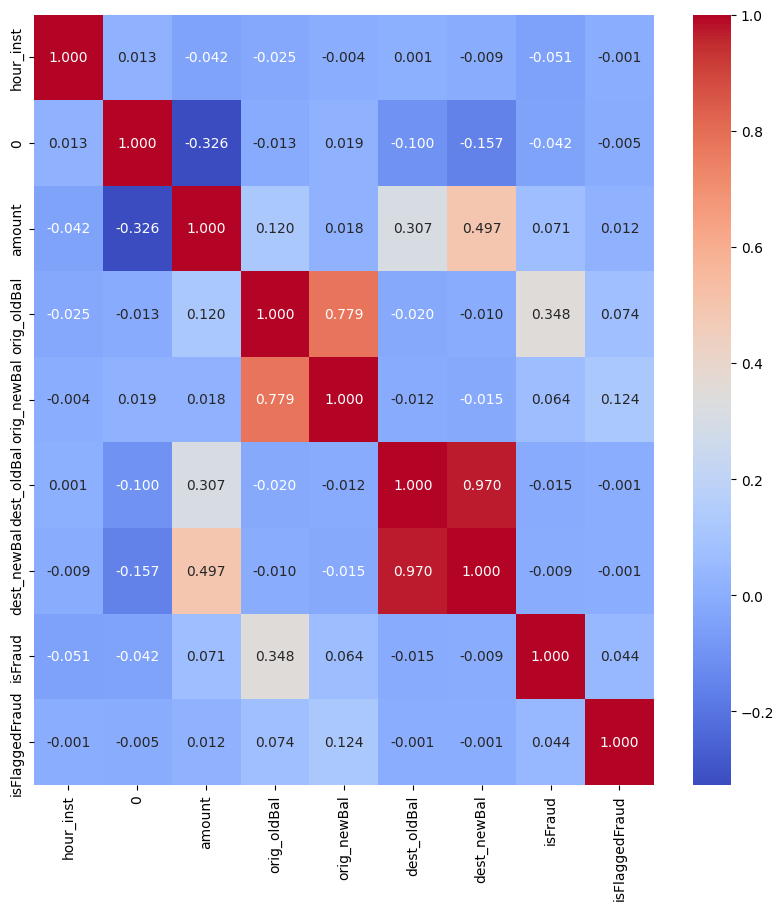

In [93]:
#Checking correlation matrix for any highly correlated variables
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(data_clean.corr(),annot=True,cmap="coolwarm", fmt=".3f")

We still see that the Old Balance and New Balance in Original account and Destination accounts are highly correlated.

It is because the same account that is being added is being deducted.

We shall drop "orig_oldBal" and "dest_oldBal" because we have the differential amounts which would be equivalent to "amount" and only one of the balances are significant(This couls be verified by PCA).

In [67]:
data_clean=data_clean.drop(["orig_oldBal",'dest_oldBal'],axis=1)
data_clean

,hour_inst,0,amount,orig_newBal,dest_newBal,isFraud,isFlaggedFraud,origName_num,destName_num
2,1,0.0,181.00,0.0,0.00,1,0,1305486145,553264065
3,1,1.0,181.00,0.0,0.00,1,0,840083671,38997010
15,1,1.0,229133.94,0.0,51513.44,0,0,905080434,476402209
19,1,0.0,215310.30,0.0,0.00,0,0,1670993182,1100439041
24,1,0.0,311685.89,0.0,2719172.89,0,0,1984094095,932583850
...,...,...,...,...,...,...,...,...,...
6362615,23,1.0,339682.13,0.0,339682.13,1,0,786484425,776919290
6362616,23,0.0,6311409.28,0.0,0.00,1,0,1529008245,1881841831
6362617,23,1.0,6311409.28,0.0,6379898.11,1,0,1162922333,1365125890
6362618,23,0.0,850002.52,0.0,0.00,1,0,1685995037,2080388513


<ipython-input-68-5965dead8c6d>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data_clean.corr(),annot=True,cmap="coolwarm", fmt=".3f")


<Axes: >

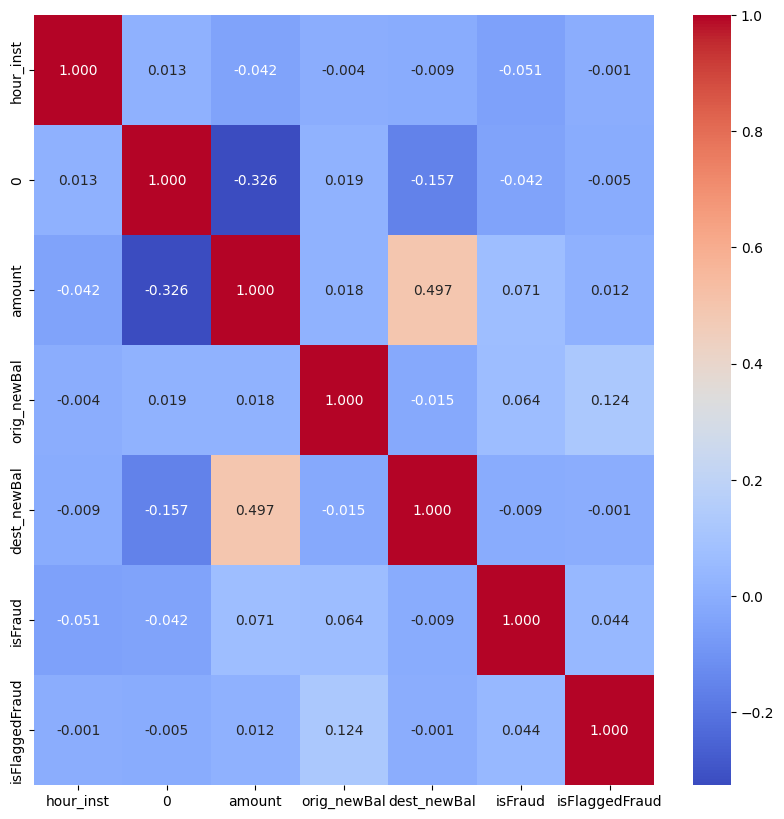

In [68]:
#Checking correlation matrix for any highly correlated variables
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(data_clean.corr(),annot=True,cmap="coolwarm", fmt=".3f")

## NORMALIZATION/STANDARDIZATION

In [69]:
data_clean.describe()

,hour_inst,0,amount,orig_newBal,dest_newBal,isFraud,isFlaggedFraud
count,2.770409e+06,2.770409e+06,2.770409e+06,2.770409e+06,2.770409e+06,2.770409e+06,2.770409e+06
mean,1.530878e+01,8.076425e-01,3.175361e+05,1.609190e+04,2.049734e+06,2.964544e-03,5.775321e-06
std,4.004595e+00,3.941525e-01,8.877897e+05,1.512558e+05,4.676990e+06,5.436687e-02,2.403183e-03
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.200000e+01,1.000000e+00,8.297354e+04,0.000000e+00,3.272891e+05,0.000000e+00,0.000000e+00
50%,1.600000e+01,1.000000e+00,1.712609e+05,0.000000e+00,8.280539e+05,0.000000e+00,0.000000e+00
75%,1.900000e+01,1.000000e+00,3.067912e+05,0.000000e+00,2.122198e+06,0.000000e+00,0.000000e+00
max,2.300000e+01,1.000000e+00,9.244552e+07,4.958504e+07,3.561793e+08,1.000000e+00,1.000000e+00


We took the summary of the cleaned dataset to check if any variables need normalization or standardization. We can see that amount shows large variations over the data samples. Alternatively, New balances at the origin and destination show range of 10e7.

We can check if normalization improves the correlation heatmap.

<Axes: xlabel='amount', ylabel='Count'>

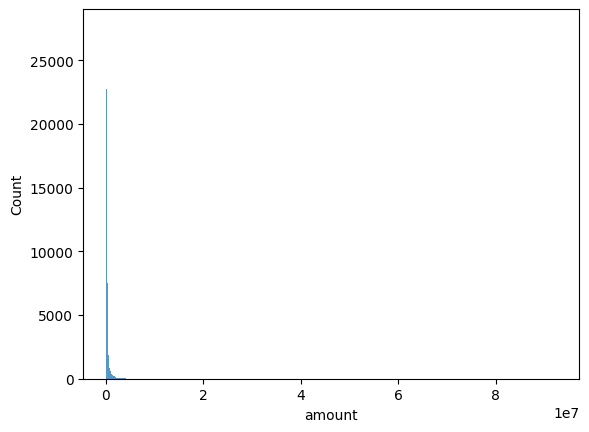

In [22]:
sns.histplot(data=data_clean, x="amount")

<Axes: xlabel='dest_newBal', ylabel='Count'>

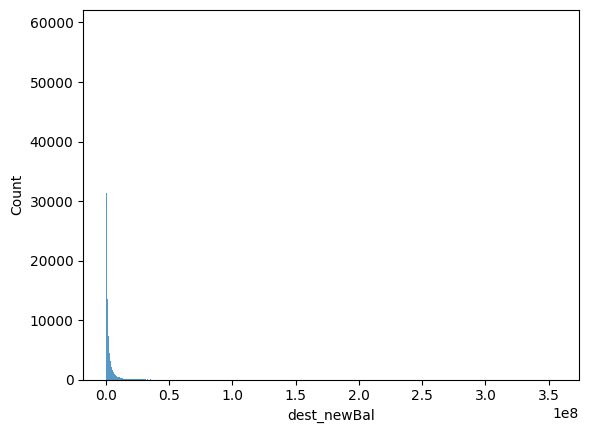

In [24]:
sns.histplot(data=data_clean, x="dest_newBal")

In [31]:
from sklearn.preprocessing import StandardScaler
scaler_amt = StandardScaler()
scaler_origBal = StandardScaler()
scaler_destBal = StandardScaler()

In [70]:
amt_std=scaler_amt.fit_transform(data_clean[['amount']])
print("Mean for Transaction Amount:",scaler_amt.mean_)
print("\nTransformed Array for Transaction Amount:",amt_std)

Mean for Transaction Amount: [317536.14086861]

Transformed Array for Transaction Amount: [[-0.35746665]
 [-0.35746665]
 [-0.09957563]
 ...
 [ 6.75145759]
 [ 0.59976648]
 [ 0.59976648]]


In [71]:
#Verify inverse transform for amount
print("Inverse-Transformed Array for Destination New Balance:",scaler_amt.inverse_transform(amt_std))

Inverse-Transformed Array for Destination New Balance: [[1.81000000e+02]
 [1.81000000e+02]
 [2.29133940e+05]
 ...
 [6.31140928e+06]
 [8.50002520e+05]
 [8.50002520e+05]]


In [73]:
orig_newBal_std =scaler_origBal.fit_transform(data_clean[['orig_newBal']])
print("Mean for Origin Old Balance:",scaler_origBal.mean_)
print("\nTransformed Array for Origin Old Balance:",orig_newBal_std)

Mean for Origin Old Balance: [16091.90467902]

Transformed Array for Origin Old Balance: [[-0.10638868]
 [-0.10638868]
 [-0.10638868]
 ...
 [-0.10638868]
 [-0.10638868]
 [-0.10638868]]


In [74]:
#Verify inverse transform for Original Old Balance
print("Inverse-Transformed Array for Destination New Balance:",scaler_amt.inverse_transform(orig_newBal_std))

Inverse-Transformed Array for Destination New Balance: [[223085.38785819]
 [223085.38785819]
 [223085.38785819]
 ...
 [223085.38785819]
 [223085.38785819]
 [223085.38785819]]


In [76]:
dest_newBal_std =scaler_destBal.fit_transform(data_clean[['dest_newBal']])
print("Mean for Destination New Balance:",scaler_destBal.mean_)
print("\nTransformed Array for Destination New Balance:",dest_newBal_std)

Mean for Destination New Balance: [2049734.43688689]

Transformed Array for Destination New Balance: [[-0.43825939]
 [-0.43825939]
 [-0.42724516]
 ...
 [ 0.92584427]
 [-0.43825939]
 [ 1.1354243 ]]


In [77]:
#Verify inverse transform for Dest New Balance
print("\nTransformed Array for Destination New Balance:",scaler_amt.inverse_transform(dest_newBal_std))


Transformed Array for Destination New Balance: [[ -71545.94187994]
 [ -71545.94187994]
 [ -61767.62320409]
 ...
 [1139490.96109196]
 [ -71545.94187994]
 [1325553.90671836]]


In [78]:
data_clean

,hour_inst,0,amount,orig_newBal,dest_newBal,isFraud,isFlaggedFraud,origName_num,destName_num
2,1,0.0,181.00,0.0,0.00,1,0,1305486145,553264065
3,1,1.0,181.00,0.0,0.00,1,0,840083671,38997010
15,1,1.0,229133.94,0.0,51513.44,0,0,905080434,476402209
19,1,0.0,215310.30,0.0,0.00,0,0,1670993182,1100439041
24,1,0.0,311685.89,0.0,2719172.89,0,0,1984094095,932583850
...,...,...,...,...,...,...,...,...,...
6362615,23,1.0,339682.13,0.0,339682.13,1,0,786484425,776919290
6362616,23,0.0,6311409.28,0.0,0.00,1,0,1529008245,1881841831
6362617,23,1.0,6311409.28,0.0,6379898.11,1,0,1162922333,1365125890
6362618,23,0.0,850002.52,0.0,0.00,1,0,1685995037,2080388513


In [80]:
data_clean_std=data_clean.drop(["amount",'orig_newBal',"dest_newBal"],axis=1)
data_clean_std.insert(3, column="amt_std",value=amt_std)
data_clean_std.insert(4, column="orig_oldBal_std",value=orig_oldBal_std)
data_clean_std.insert(5, column="dest_newBal_std",value=dest_newBal_std)
data_clean_std

,hour_inst,0,isFraud,amt_std,orig_oldBal_std,dest_newBal_std,isFlaggedFraud,origName_num,destName_num
2,1,0.0,1,-0.357467,-0.188847,-0.438259,0,1305486145,553264065
3,1,1.0,1,-0.357467,-0.188847,-0.438259,0,840083671,38997010
15,1,1.0,0,-0.099576,-0.128591,-0.427245,0,905080434,476402209
19,1,0.0,0,-0.115146,-0.186762,-0.438259,0,1670993182,1100439041
24,1,0.0,0,-0.006590,-0.146456,0.143134,0,1984094095,932583850
...,...,...,...,...,...,...,...,...,...
6362615,23,1.0,1,0.024945,1.161997,-0.365631,0,786484425,776919290
6362616,23,0.0,1,6.751458,24.922965,-0.438259,0,1529008245,1881841831
6362617,23,1.0,1,6.751458,24.922965,0.925844,0,1162922333,1365125890
6362618,23,0.0,1,0.599766,3.192516,-0.438259,0,1685995037,2080388513


<ipython-input-81-de8aa67e938d>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data_clean_std.corr(),annot=True,cmap="coolwarm", fmt=".3f")


<Axes: >

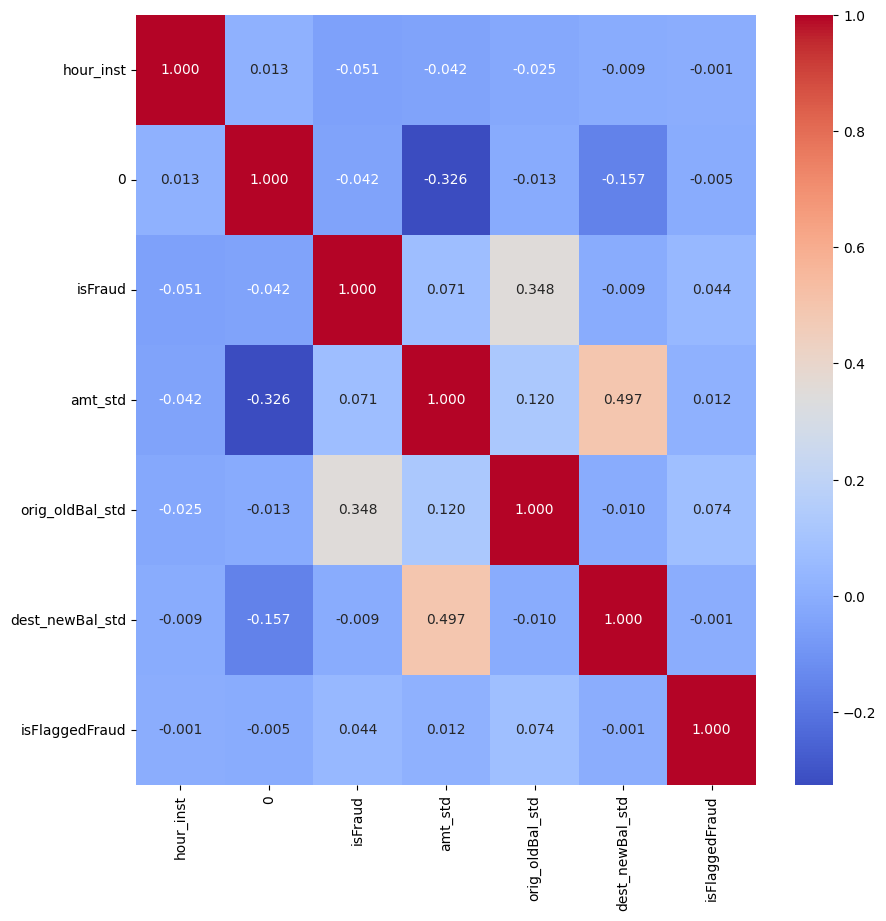

In [81]:
#Checking Corr heatmap again
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(data_clean_std.corr(),annot=True,cmap="coolwarm", fmt=".3f")

From the above histograms, we see that the curves are highly right-skewed i.e. the count of very high amounted transactions is very low, indicating the scarcity of minority class. They would be treated as outliers, and we know that Normalization does not work well with outliers.

Therefore, we shall first Oversample the data points, then check for the need to Normalize.

## DATA OVERSAMPLING TECHNIQUES

As per the scope of this project, we choose "Oversampling" or a combination of Oversampling and Undersampling(SMOTETomek and SMOTEENN) to combat the problem of imbalanced sets.


**Need for OverSampling:**

In such cases where one class (usually the minority class) has significantly fewer samples than the other classes (majority class), standard machine learning algorithms can be biased towards the majority class, leading to poor performance in predicting the minority class which is also the Class of interest for our case.

Reasons for Oversampling may be summed up as:
* Increasing the number of samples to increase the predictive accuracy for minoirty class
* Subsequently, reduce the bias of algorithm towards Majority class
* Reducing the risk of model misclassifying instances from the minority class that could have severe consequences or costs (Eg: Bank Frauds Analysis, Medical Predictive Analysis)





We shall be doing a comparative study of combinations of each of the Overasampling Techniques in {SMOTE,ADASYN, SMOTE+Tomek, SMOTE+ENN} with Models in {Logistic Regression, k-Nearest Neighbours, XGBoost(Boost/Decision Trees), Random Forests} for evaluating the best performance for the given Bank Fraud Prediction Problem.

Each of the techniques employs different methodology to synthetically add datapoints to the minority class.

We have defined an Oversampling Class as  Wrapper class for different Oversampling Techniques where each technique may be used as class method, without explicitly coding for each method again.

In [86]:
import imblearn
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN
from imblearn.combine import SMOTETomek
from imblearn.combine import SMOTEENN

In [82]:
data_clean_std.columns.tolist()

['hour_inst',
 '0',
 'isFraud',
 'amt_std',
 'orig_oldBal_std',
 'dest_newBal_std',
 'isFlaggedFraud',
 'origName_num',
 'destName_num']

In [84]:
x_train=data_clean_std[['hour_inst',
 '0',
 'amt_std',
 'orig_oldBal_std',
 'dest_newBal_std',
 'isFlaggedFraud',
 'origName_num',
 'destName_num']]
y_train=data_clean_std[["isFraud"]]

### SMOTE

In [119]:
#oversampling using SMOTE
smt=SMOTE()
xTrain_smt,yTrain_smt=smt.fit_resample(x_train,y_train)

In [123]:
print("Percentage of (Fraud==1) Class Data Points before SMOTE: ",(round((y_train['isFraud']==1).sum()/len(y_train)*100,4)))
print("Percentage of (Fraud==1) Class Data Points after SMOTE: ",(yTrain_smt['isFraud']==1).sum()/len(yTrain_smt)*100)

Percentage of (Fraud==1) Class Data Points before SMOTE:  0.2965
Percentage of (Fraud==1) Class Data Points after SMOTE:  50.0


### ADASYN

In [124]:
#oversampling using ADASYN
ada=ADASYN()
xTrain_ada,xTrain_ada=ada.fit_resample(x_train,y_train)

### SMOTE+Tomek

In [ ]:
#oversampling using SMOTE+Tomek
smt_tmk=SMOTETomek()
xTrain_smttmk,yTrain_smttmk=smt_tmk.fit_resample(x_train,y_train)

### SMOTE+ENN

In [ ]:
#oversampling using SMOTE+Tomek
smt_enn=SMOTEENN()
xTrain_smtenn,yTrain_smtenn=smt_enn.fit_resample(x_train,y_train)